# Clasificación multiclase

## Introduction

En este ejercicio se implementa la regresion one-vs-all y una red neuronal para reconocimiento de digitos.

Antes de empezar la ejecución de las partes de codigo correspondienters a los ejercicios, se requiere importar todas las librerias necesarias.

In [7]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive/')

import pandas as pd

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [9]:
trainData = pd.read_csv('/content/gdrive/MyDrive/sis420/2doparcial/1/fashion-mnist_train.csv')       
testData = pd.read_csv('/content/gdrive/MyDrive/sis420/2doparcial/1/fashion-mnist_test.csv')

print('\t Filas,  Columnas', )
print('Train:\t', trainData.shape)
print('Test:\t', testData.shape)


	 Filas,  Columnas
Train:	 (60000, 785)
Test:	 (10000, 785)
[10 10 10 ...  9  9  9]
[0 0 0 ... 9 9 9]


In [31]:
'''print(X)
print(y)
print(m) '''
trainData.head(4).append(trainData.tail(4))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [32]:
labels = {  0: "Camiseta / Top",
            1: "Pantalón",
            2: "Jersey",
            3: "Vestido",
            4: "Abrigo",
            5: "Sandalia",
            6: "Camisa",
            7: "Zapatilla de deporte",
            8: "Bolsa",
            9: "Botines"
         }

n_cat = len(labels)

def add_column_from_dict(data, col, new_col, dict_):
    data[new_col] = data[col].map(dict_)
    return data

#Agrega nueva columna labelName con el nombre de prenda
add_column_from_dict(trainData, 'label', 'labelName', labels)
add_column_from_dict(testData, 'label', 'labelName', labels)


def plot_image_sample(data, label_number, DataSetType, pf, pc):
    
    type_data = ('TRAIN' if DataSetType.lower().find("train") == label_number else 'TEST')
    
    # Obtenemos la etiqueta (diccionario)
    etiqueta = labels[label_number]
    # Eliminamos la primera columna (codigo etiqueta) y la última (nombre etiqueta)
    aux = data[data["label"] == label_number].sample(1)
    aux2 = aux.iloc[:, 1:-1]
    img = np.array(aux2).reshape(pf, pc)

    pyplot.imshow(img, cmap = 'gray')
    pyplot.grid(True)
    plot = pyplot.title('Ropa: ' + str(etiqueta) + '\nDatos: ' + str(type_data))
    

def matrix_image_sample(data, label_number, pf ,pc):
    
    pd.options.display.max_columns = None
    aux = data[data["label"] == label_number].sample(1)
    aux2 = aux.iloc[:, 1:-1]
    img = pd.DataFrame(np.array(aux2).reshape(pf, pc))

    return img 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,3,0,53,69
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,42,17
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,3,0,0,0,0,0,6,0,1,94,3
6,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,85,61,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,108,168,0,0,0,0,0,0,0,96,83,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,131,253,177,194,192,186,181,121,184,226,2,0,2
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,109,237,238,246,244,242,245,239,227,192,0,0,1


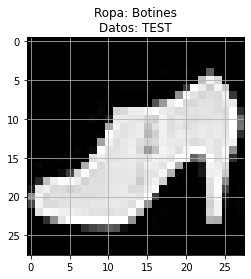

In [34]:
#pf-> pixeles fila, pc-> pixeles columna
pf = 28
pc = 28

plot_image_sample(trainData, 9, 'train', pf, pc)
matrix_image_sample(trainData, 9, pf, pc)

### 1.2 Visualización de los datos

Se comenzará visualizando un subconjunto del conjunto de entrenamiento. Se selecciona al azar, 100 filas de `X` y pasa esas filas a la función` displayData`. Esta función asigna cada fila a una imagen en escala de grises de 20 píxeles por 20 píxeles y muestra las imágenes juntas.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,4,109,0,0,2,1,0,0,126,17,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,23,203,16,0,0,0,0,2,195,76,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,110,84,88,72,55,110,86,100,37,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,129,147,161,180,124,173,118,152,35,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,92,45,52,12,86,161,119,151,16,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,139,111,113,104,109,186,130,153,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,3,107,72,93,50,103,179,127,166,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,7,83,88,70,61,90,187,130,130,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,4,138,119,133,97,71,222,120,159,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,34,140,147,123,103,144,165,111,175,0,0,0,0,0,0,0,0,0,0


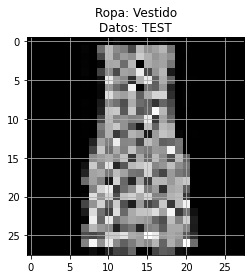

In [35]:
plot_image_sample(testData, 3, 'Test', pf, pc)
matrix_image_sample(testData, 3, pf, pc)

In [45]:
from tensorflow import keras

def preprocesamiento(data, pf, pc):
    
    out_Y = keras.utils.to_categorical(data.label, len(labels))
    x_vect = data.values[:,1:-1]  #transformamos el dataFrame en un ndarray, seleccionando solo los píxeles
    x_scaled = x_vect / 255 # Dividimos por 255 por literatura (convergencia del gradiente, evita le colapso)
    n_img = data.shape[0]
    out_X = x_scaled.reshape(n_img, pf, pc, 1) # redimensionamos el vector a (1,784) a (28, 28, 1)  
    
    out_X = out_X.astype(float)
    out_Y = out_Y.astype(float)
    
    return out_X, out_Y

In [46]:
x_train, y_train = preprocesamiento(trainData, pf, pc)
x_test, y_test = preprocesamiento(testData, pf, pc)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

def proc_data_to_plot(data):

    freq = []
    for i in range(len(data)):
        freq.append(np.argmax(data[i]))
        
    return pd.DataFrame(freq, columns = ['Label'])

In [49]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D



#Parte 1 del modelo
model = Sequential()

LeakyReLU = lambda x: tf.keras.activations.relu(x, alpha=0.1)
model.add(Conv2D(32, 
                 kernel_size = (3, 3),
                 activation = LeakyReLU,
                 padding="same",
                 input_shape=(pf, pc, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


#Parte 2 del modelo
model.add(Conv2D(64, 
                 kernel_size = (3, 3), 
                 activation = LeakyReLU,
                 padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))


#Parte 3 del modelo
model.add(Conv2D(128, (3, 3), activation = LeakyReLU))
model.add(Flatten())                               # Flatemos el tensor de pixeles:
model.add(Dense(128, activation = LeakyReLU))
model.add(Dropout(0.3))
model.add(Dense(n_cat, activation = 'softmax'))    # La ultima capa debe ser el nº de lables a predecir

In [50]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         7

In [55]:
#batch = 70
#epocas = 50
batch = 70
epocas = 5
 
train_model = model.fit(X_train, Y_train,
                        batch_size = batch,
                        epochs = epocas,
                        verbose = 1,
                        validation_data = (X_val, Y_val))

Epoch 1/5
600/600 [==============================] - 80s 133ms/step - loss: 0.3510 - accuracy: 0.8710 - val_loss: 0.2854 - val_accuracy: 0.8962
Epoch 2/5
600/600 [==============================] - 77s 128ms/step - loss: 0.3154 - accuracy: 0.8822 - val_loss: 0.2771 - val_accuracy: 0.8991
Epoch 3/5
600/600 [==============================] - 77s 128ms/step - loss: 0.2975 - accuracy: 0.8912 - val_loss: 0.2586 - val_accuracy: 0.9067
Epoch 4/5
600/600 [==============================] - 76s 127ms/step - loss: 0.2842 - accuracy: 0.8945 - val_loss: 0.2551 - val_accuracy: 0.9086
Epoch 5/5
600/600 [==============================] - 77s 128ms/step - loss: 0.2713 - accuracy: 0.8994 - val_loss: 0.2473 - val_accuracy: 0.9103


In [56]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Perdida/Loss Test:', score[0])
print('Precision/Accuracy Test:', score[1])

Perdida/Loss Test: 0.22488020360469818
Precision/Accuracy Test: 0.9150000214576721


In [57]:
pred = model.predict_classes(x_test)
y_true = testData.iloc[:,0].to_numpy()
n = len(pred[:10000])

GoodPred = np.where((pred[:10000] == y_true[:10000]) == True)[0]
BadPred  = np.where((pred[:10000] == y_true[:10000]) == False)[0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
print('Se han predicho correctamente ' + str(GoodPred.shape[0]) + 
      ' clases de ' + str(n) + '.\tAcc: ' + str(round((GoodPred.shape[0]/n)*100, 2)) + '%')

print('Se han predicho erróneamente ' + str(BadPred.shape[0]) +
      ' clases de ' + str(n) + '.\tAcc: ' + str(round((BadPred.shape[0]/n)*100, 2)) + '%')

Se han predicho correctamente 9150 clases de 10000.	Acc: 91.5%
Se han predicho erróneamente 850 clases de 10000.	Acc: 8.5%
